In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('final_dataset.csv', usecols = ['idno', 'happy', 'weighta', 'fnsdfml', 'cnfpplh', 'marsts', 'paccnt', 'eisced', 'emplrel', 'hincfel', 'uemp12m', 'uempla', 'actrolga'])

In [ ]:
data


,idno,happy,weighta,fnsdfml,cnfpplh,marsts,paccnt,eisced,emplrel,hincfel,uemp12m,uempla,actrolga
0,50014,8,90,5,4,66,1,3,6,1,6,0,5
1,50030,9,74,4,2,6,0,5,1,2,6,0,2
2,50057,9,95,2,4,66,1,6,1,1,6,0,4
3,50106,7,70,3,4,4,1,5,1,2,6,0,2
4,50145,9,67,5,5,66,1,3,1,2,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,86379,5,95,3,2,6,1,2,6,2,6,0,2
40152,86407,7,86,4,3,66,1,4,1,1,6,0,3
40153,86408,10,63,5,5,66,1,7,1,1,6,0,3
40154,86426,8,55,4,3,6,1,1,6,2,6,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idno      40156 non-null  int64  
 1   happy     40024 non-null  float64
 2   weighta   40156 non-null  int64  
 3   fnsdfml   39599 non-null  float64
 4   cnfpplh   39728 non-null  float64
 5   marsts    20608 non-null  float64
 6   paccnt    40156 non-null  int64  
 7   eisced    29282 non-null  float64
 8   emplrel   36212 non-null  float64
 9   hincfel   39705 non-null  float64
 10  uemp12m   10290 non-null  float64
 11  uempla    40156 non-null  int64  
 12  actrolga  39559 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 4.0 MB


In [ ]:
data[['happy', 'marsts', 'eisced']] = data[['happy', 'marsts', 'eisced']].replace(to_replace= [66, 77, 88, 99], value=np.nan)
data[['fnsdfml', 'cnfpplh', 'hincfel', 'actrolga']] = data[['fnsdfml', 'cnfpplh', 'hincfel', 'actrolga']].replace(to_replace= [7, 8, 9], value=np.nan)
data[['emplrel', 'uemp12m', 'eisced']] = data[['emplrel', 'uemp12m', 'eisced']].replace(to_replace= [6, 7, 8, 9], value=np.nan)


In [ ]:
nul = data.isna().sum().reset_index()
nul.columns = ['column_name', 'nulls']
nul['snt'] = nul.nulls * 100 / 40156
nul

,column_name,nulls,snt
0,idno,0,0.000000
1,happy,132,0.328718
2,weighta,0,0.000000
3,fnsdfml,557,1.387090
4,cnfpplh,428,1.065843
5,marsts,19548,48.680147
6,paccnt,0,0.000000
7,eisced,10874,27.079390
8,emplrel,3944,9.821695
9,hincfel,451,1.123120


Исключаем колонки uemp12m и marsts. надо выбрать порог исключения, чтоб точнее сказать о других колонках. колонка eisced содержит около 30 % пустых значений, но отвечает за образование, что важно.

happy	132	0.328718 - удалить нулевые значения

2	weighta	0	0.000000

3	fnsdfml	557	1.387090 - заполнить модой

4	cnfpplh	428	1.065843 - заполнить модой

5	marsts	19548	48.680147 - удалить колонку

6	paccnt	0	0.000000

7	eisced	10874	27.079390 - заполнить модой

8	emplrel	3944	9.821695 - заполнить модой

9	hincfel	451	1.123120 - заполнить модой

10	uemp12m	29866	74.374938 - удалить колонку

11	uempla	0	0.000000

12	actrolga	597	1.486702 - заполнить модой

In [ ]:
data_new = data.drop(columns= ['uemp12m', 'marsts'])\
               .dropna(subset = 'happy')

for column in data_new.columns:
        mode_value = data_new[column].mode()[0]
        data_new[column] = data_new[column].fillna(mode_value)

In [ ]:
data_new.info()



<class 'pandas.core.frame.DataFrame'>
Index: 40024 entries, 0 to 40155
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idno      40024 non-null  int64  
 1   happy     40024 non-null  float64
 2   weighta   40024 non-null  int64  
 3   fnsdfml   40024 non-null  float64
 4   cnfpplh   40024 non-null  float64
 5   paccnt    40024 non-null  int64  
 6   eisced    40024 non-null  float64
 7   emplrel   40024 non-null  float64
 8   hincfel   40024 non-null  float64
 9   uempla    40024 non-null  int64  
 10  actrolga  40024 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.7 MB


In [ ]:
data_new.describe()


,idno,happy,weighta,fnsdfml,cnfpplh,paccnt,eisced,emplrel,hincfel,uempla,actrolga
count,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000
mean,68996.003323,7.488282,115.478538,3.726464,3.878598,0.798646,3.581001,1.146462,1.860084,0.027059,2.109784
std,11211.771263,1.790229,177.635941,1.149945,1.052065,0.401017,3.114243,0.395027,0.790508,0.162257,1.073605
min,50002.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,59405.000000,7.000000,65.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000
50%,68807.500000,8.000000,75.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,0.000000,2.000000
75%,78240.500000,9.000000,87.000000,5.000000,5.000000,1.000000,4.000000,1.000000,2.000000,0.000000,3.000000
max,99403.000000,10.000000,999.000000,5.000000,5.000000,1.000000,55.000000,3.000000,4.000000,1.000000,5.000000


Похоже, в данных веса респондентов есть выбросы. исключим респондентов с весом 999, 888, 777

In [ ]:
data_new.weighta.sort_values(ascending = False).head(10)

,weighta
23059,999
23310,999
23390,999
23360,999
12869,999
7017,999
23346,999
12890,999
12902,999
28560,999


In [ ]:
df = data_new[(data_new.weighta != 999) & (data_new.weighta != 888) & (data_new.weighta != 777)]


In [ ]:
df.weighta.sort_values(ascending = False).head(10)


,weighta
30029,148
12240,148
30792,145
7592,145
23797,145
6016,145
9262,145
30124,143
30455,140
6203,140


In [ ]:
df.describe()

,idno,happy,weighta,fnsdfml,cnfpplh,paccnt,eisced,emplrel,hincfel,uempla,actrolga
count,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000
mean,68992.048693,7.511806,75.634091,3.727853,3.877006,0.802416,3.593250,1.146973,1.851898,0.026448,2.115719
std,11227.740228,1.774057,14.925328,1.147544,1.049330,0.398182,3.101908,0.395500,0.787233,0.160465,1.073495
min,50002.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,59385.500000,7.000000,65.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000
50%,68780.000000,8.000000,75.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,0.000000,2.000000
75%,78255.000000,9.000000,85.000000,5.000000,5.000000,1.000000,4.000000,1.000000,2.000000,0.000000,3.000000
max,99403.000000,10.000000,148.000000,5.000000,5.000000,1.000000,55.000000,3.000000,4.000000,1.000000,5.000000


In [ ]:
df.corr()

,idno,happy,weighta,fnsdfml,cnfpplh,paccnt,eisced,emplrel,hincfel,uempla,actrolga
idno,1.000000,0.005027,-0.001577,0.003370,0.003296,-0.003355,-0.000888,-0.004381,0.014336,-0.003205,-0.006013
happy,0.005027,1.000000,0.000420,0.189757,0.147830,0.095642,0.036361,0.007110,-0.322694,-0.057607,0.114164
weighta,-0.001577,0.000420,1.000000,-0.036922,-0.023045,0.004810,0.016104,0.066588,-0.013028,-0.016686,0.106572
fnsdfml,0.003370,0.189757,-0.036922,1.000000,0.403834,0.101087,0.047638,0.003063,-0.281422,-0.036507,0.069699
cnfpplh,0.003296,0.147830,-0.023045,0.403834,1.000000,0.110617,-0.012457,0.011852,-0.088217,-0.032155,-0.051228
paccnt,-0.003355,0.095642,0.004810,0.101087,0.110617,1.000000,0.009187,0.011621,-0.128714,-0.067017,-0.007831
eisced,-0.000888,0.036361,0.016104,0.047638,-0.012457,0.009187,1.000000,-0.006269,-0.072597,0.010849,0.084871
emplrel,-0.004381,0.007110,0.066588,0.003063,0.011852,0.011621,-0.006269,1.000000,-0.027181,-0.026487,0.034051
hincfel,0.014336,-0.322694,-0.013028,-0.281422,-0.088217,-0.128714,-0.072597,-0.027181,1.000000,0.129561,-0.170141
uempla,-0.003205,-0.057607,-0.016686,-0.036507,-0.032155,-0.067017,0.010849,-0.026487,0.129561,1.000000,-0.003130


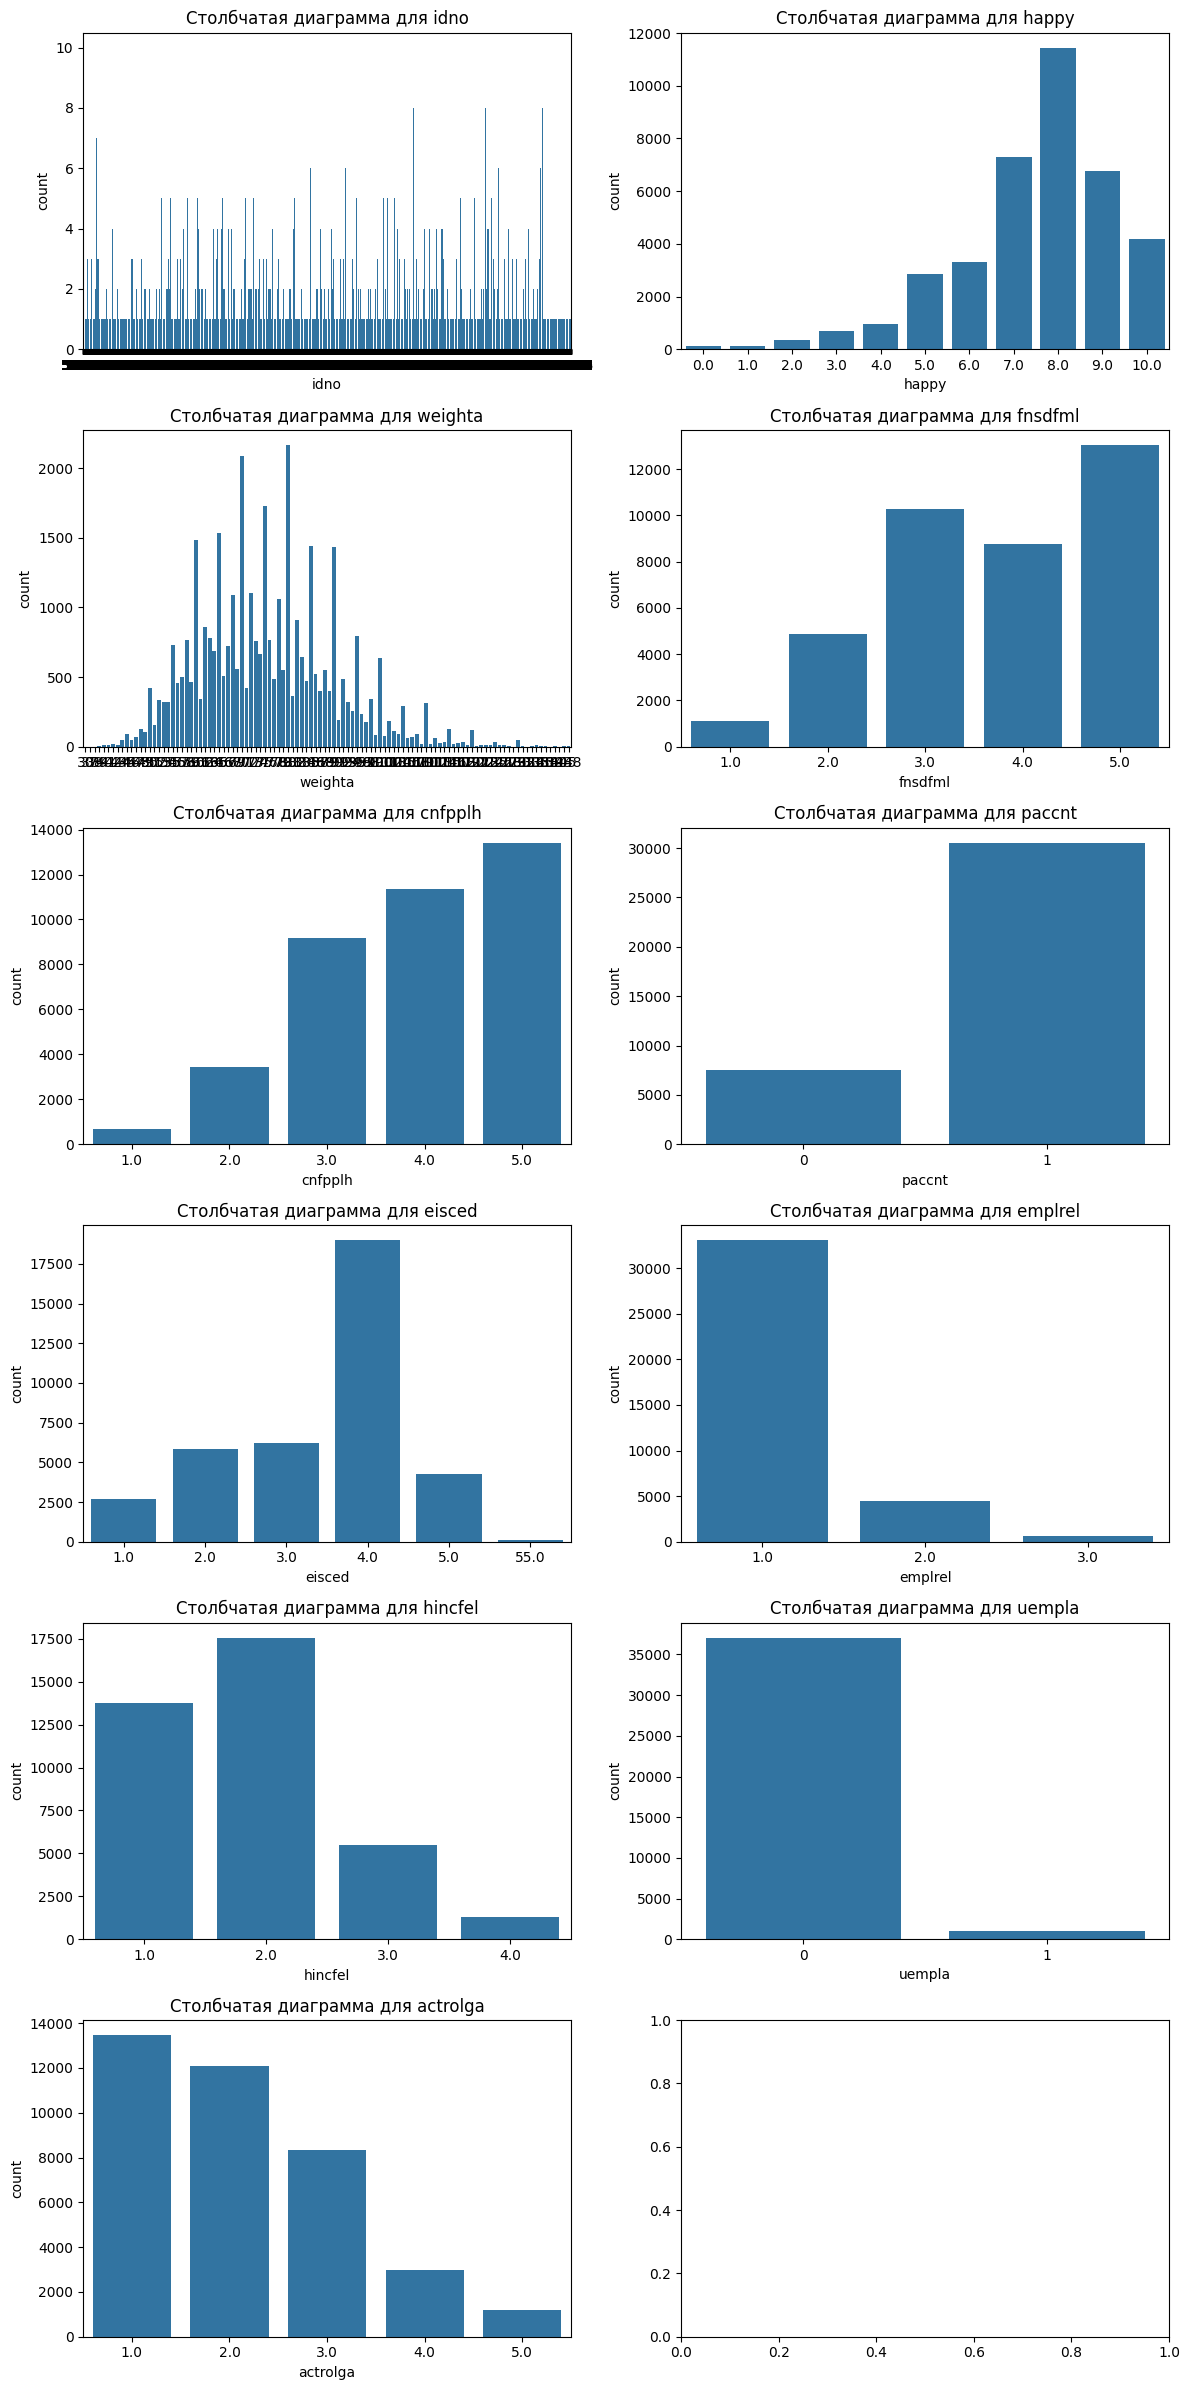

In [ ]:
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Две диаграммы в строке

# Создаем фигуру для подграфиков
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Плоский массив осей для удобства
axes = axes.flatten()

# Цикл по столбцам DataFrame
for i, column in enumerate(df.columns):
      sns.countplot(data=df, x=column, ax=axes[i])
      axes[i].set_title(f'Столбчатая диаграмма для {column}')


plt.tight_layout()
plt.show()
